In [1]:
import pandas as pds
import numpy as np
import os
from matplotlib import pyplot as plt
import defs
import simu

In [2]:
name_DF = 'DF_N=4401_2023-01-16.csv'
DF = pds.read_csv(os.path.join('..', 'datasets', name_DF), delimiter = ',')
DF = DF[~DF.duplicated()] # delete duplicates
DF = DF.dropna() # delete NaN values
DF['was_assigned_female'] = DF['was_assigned_female'].astype('int32') # turn was_born_female into int type (once Nan values have been removed)
DF = DF.drop(['name', 'family_name'], axis=1)

# generate covariates
DF['X1'] = 2020 - DF['birth_year'] # age
DF['X2'] = np.random.normal(loc = 2.5, scale = 1, size = DF.shape[0])
DF['X3'] = np.random.normal(loc = 0, scale = 1, size = DF.shape[0])
DF['X4'] = np.random.normal(loc = 1, scale = 1, size = DF.shape[0])
DF['X5'] = np.random.normal(loc = 1, scale = 1, size = DF.shape[0])

# generate treatment
DF['treatment'] = np.random.binomial(n = 1, p = 1 / ( 1 + np.exp(0.1*DF.X1 -0.2*DF.X2 +0.3*DF.X3 -0.4*DF.X4 +0.5*DF.X5) )) # probability depending on covariates

# generate outcome
residual_errors = np.random.normal(size = DF.shape[0])
aaa = 5.5
bbb = 0.01
ccc = 0.08
ddd = 0.7

ate_on_DF = aaa * 2.5
DF['Y'] = - 10 + aaa*DF['treatment']*DF['X2'] + bbb*np.exp(DF['X4']) + ccc*DF['X3']*DF['X1'] + ddd*DF['X5'] 

# generate new categorical variables for linkage
DF['id1'] = np.random.choice(np.arange(10), size = DF.shape[0]).astype(int)
DF['id2'] = np.random.choice(np.arange(15), size = DF.shape[0]).astype(int)
DF['id3'] = np.random.choice(np.arange(5), size = DF.shape[0]).astype(int)

identifiers = {'was_assigned_female':'strict','country':'strict','birth_year':'strict','id1':'strict','id2':'strict','id3':'strict'} # 'family_name':'jaro-winkler',
covariates = ['X1','X2','X3','X4','X5']

nbr_in_common = 100
nbr_iter = 1500
approx_integral = 100
a_sigma, b_sigma, a_sigma2, b_sigma2, a, b, alpha_pi, beta_pi = 1, 1, 1, 1, 1, 1, 1, 1
montecarlo_size_CI = 250

methods = {'jaro-winkler':defs.jaro_winkler_similarity, 'levenshtein':defs.levenshtein_similarity, 'strict':defs.strict_equality, 'large':defs.large_equality}

dict_params_legend = {
    "unmatch":identifiers.keys(), 
    "match":identifiers.keys(), 
    "sigma_square":[f"$\sigma^2$"], 
    "betas":[ r"$\beta_0$", r"$\beta_1$", r"$\beta_2$", r"$\beta_3$", r"$\beta_4$", r"$\beta_5$", r"$\beta_6$", r"$\beta_7$" ], 
    "sigma2_square":[r"$\sigma_2^2$"], 
    "mu2":[r"$\mu_2$"], 
    "atel":["atel"]}

dict_params_title = {
    "unmatch":"unmatch", 
    "match":"match", 
    "sigma_square":r"$\sigma^2$", 
    "betas":r"$\beta$",
    "sigma2_square":r"$\sigma_2^2$", 
    "mu2":r"$\mu_2$", 
    "atel":"atel"}

sizeA = 430
sizeB = 250
n_A = sizeA + nbr_in_common
n_B = sizeB + nbr_in_common

dict_coverage = {"mean":[], "bounds_tuple":[], "ate_common_records":[], "ate_mean":[]}

In [3]:
# from bartpy.sklearnmodel import SklearnModel
# from bartpy.features.featureselection import SelectNullDistributionThreshold, SelectSplitProportionThreshold
# from bartpy.diagnostics.features import *

# X = np.array(DF[covariates])
# y = np.array(DF['Y'])
# model = SklearnModel() # n_samples=200, n_burn=50, n_trees=10, store_in_sample_predictions=False, n_jobs=1
# model.fit(X, y)

In [4]:
params = {'DF':DF, 
          'identifiers':identifiers,
          'aaa':aaa, 
          'methods':methods, 
          'covariates':covariates,
          'nbr_in_common':100,
          'nbr_iter':nbr_iter, 
          'approx_integral':approx_integral, 
          'a_sigma':1, 
          'b_sigma':1, 
          'a_sigma2':1, 
          'b_sigma2':1, 
          'a':1, 
          'b':1, 
          'alpha_pi':1, 
          'beta_pi':1, 
          'montecarlo_size_CI':montecarlo_size_CI,
          'coverage':True,
          'burn_in':True}

n_mcmc =1
for _ in range(n_mcmc):
    mean, bounds_tuple, ate_common_records, ate_mean = simu.Simulation_Gibbs_Sampler_BART(params)
    dict_coverage["mean"].append(mean)
    dict_coverage["bounds_tuple"].append(bounds_tuple)
    dict_coverage["ate_common_records"].append(ate_common_records)
    dict_coverage["ate_mean"].append(ate_mean)

# from multiprocessing import cpu_count
# from multiprocessing.pool import Pool
# cpu_count()

# if __name__ == "__main__":
#     n_mcmc = 8
#     mcmc_params = []
#     for i in range(n_mcmc):
#         tmp = params.copy()
#         mcmc_params.append(tmp)

#     with Pool(processes=n_mcmc) as pool:
#         results = pool.map(simu.Simulation_Gibbs_Sampler, mcmc_params)


  0%|          | 0/1500 [00:00<?, ?it/s]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s],  8.92s/it]

Starting burn


  0%|          | 0/20 [00:00<?, ?it/s].86it/s]

Starting burn
Starting burn
Starting burn


 80%|████████  | 16/20 [00:01<00:00, 15.56it/s]

Starting sampling


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.87it/s]/it]

Starting burn
Starting burn


  0%|          | 0/20 [00:00<?, ?it/s].73it/s]

Starting burn
Starting burn


 80%|████████  | 16/20 [00:00<00:00, 16.52it/s]

Starting sampling
Starting sampling


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.70it/s]/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s],  8.35s/it]

Starting burn
Starting burn
Starting burn


 30%|███       | 6/20 [00:00<00:00, 15.16it/s]

Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling


  6%|▌         | 6/100 [00:00<00:05, 16.35it/s]

Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.50it/s]/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s],  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.67it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 7/1500 [00:58<3:23:39,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.06it/s]/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s],  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.12it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  1%|          | 11/1500 [01:31<3:25:05,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  1%|          | 12/1500 [01:39<3:25:44,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.68it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.95it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.94it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.02it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  1%|          | 16/1500 [02:13<3:27:03,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  1%|          | 17/1500 [02:21<3:27:26,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  1%|          | 18/1500 [02:30<3:27:24,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  1%|▏         | 19/1500 [02:38<3:27:58,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.09it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  1%|▏         | 22/1500 [03:04<3:27:51,  8.44s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.07it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  2%|▏         | 24/1500 [03:20<3:27:33,  8.44s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5,  8.46s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.00it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3,  8.50s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.89it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.89it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  2%|▏         | 28/1500 [03:55<3:29:31,  8.54s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.06it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0,  8.61s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  2%|▏         | 30/1500 [04:12<3:28:50,  8.52s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.09it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3,  8.48s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.92it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  2%|▏         | 32/1500 [04:28<3:26:48,  8.45s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.61it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7,  8.45s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  2%|▏         | 35/1500 [04:54<3:26:57,  8.48s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  2%|▏         | 36/1500 [05:02<3:26:51,  8.48s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0,  8.47s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5,  8.44s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  3%|▎         | 40/1500 [05:36<3:24:02,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  3%|▎         | 42/1500 [05:53<3:22:56,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.95it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.61it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9,  8.32s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.15it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  3%|▎         | 47/1500 [06:34<3:20:42,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.03it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  3%|▎         | 49/1500 [06:50<3:20:01,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.28it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.90it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  4%|▎         | 56/1500 [07:49<3:22:07,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.15it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.16it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.19it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.95it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.84it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.98it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.11it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.12it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.83it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.05it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.96it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.10it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  5%|▌         | 76/1500 [10:37<3:19:03,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.12it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  5%|▌         | 78/1500 [10:54<3:18:59,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


100%|██████████| 100/100 [00:06<00:00, 16.32it/s]

  5%|▌         | 79/1500 [11:02<3:19:04,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.94it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.13it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.28it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  5%|▌         | 82/1500 [11:27<3:18:02,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  6%|▌         | 84/1500 [11:44<3:18:28,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.14it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  6%|▌         | 85/1500 [11:52<3:17:30,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.24it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  6%|▌         | 89/1500 [12:26<3:16:21,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.93it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.85it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.96it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  6%|▌         | 93/1500 [12:59<3:15:48,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  6%|▋         | 95/1500 [13:16<3:16:37,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.14it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4,  8.48s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 12.47it/s]s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  7%|▋         | 100/1500 [13:58<3:15:25,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]38,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.08it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]34,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]39,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  7%|▋         | 104/1500 [14:32<3:14:40,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.74it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  7%|▋         | 105/1500 [14:40<3:14:22,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]48,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.09it/s]2s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]07,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]07,  8.42s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.83it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.37it/s]1s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.87it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  7%|▋         | 111/1500 [15:30<3:15:01,  8.42s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 12.58it/s]2s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.25it/s]8s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  8%|▊         | 114/1500 [15:56<3:15:57,  8.48s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.59it/s]9s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  8%|▊         | 116/1500 [16:13<3:14:42,  8.44s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  8%|▊         | 117/1500 [16:21<3:13:17,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]42,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  8%|▊         | 119/1500 [16:38<3:14:02,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]11,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]27,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  8%|▊         | 122/1500 [17:03<3:12:55,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]15,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  8%|▊         | 124/1500 [17:20<3:12:58,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.05it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]50,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  8%|▊         | 126/1500 [17:37<3:12:40,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  8%|▊         | 127/1500 [17:45<3:12:21,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.09it/s]2s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  9%|▊         | 129/1500 [18:02<3:11:42,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]02,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]28,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.10it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]20,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]19,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.18it/s]4s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  9%|▉         | 135/1500 [18:52<3:10:02,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]26,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]37,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  9%|▉         | 138/1500 [19:17<3:08:05,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  9%|▉         | 139/1500 [19:25<3:08:30,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  9%|▉         | 140/1500 [19:33<3:08:15,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]24,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  9%|▉         | 142/1500 [19:50<3:10:04,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]36,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.13it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|▉         | 144/1500 [20:07<3:09:28,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]37,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|▉         | 146/1500 [20:24<3:10:56,  8.46s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]36,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]37,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|▉         | 149/1500 [20:49<3:07:42,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]27,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]15,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]36,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]14,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]05,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]55,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.13it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 156/1500 [21:48<3:07:29,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]36,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]00,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]14,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.72it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]45,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]18,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.37it/s]9s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.84it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]38,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]37,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]23,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 11%|█         | 166/1500 [23:11<3:05:29,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 11%|█         | 167/1500 [23:19<3:04:40,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]37,  8.32s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.99it/s]4s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 11%|█▏        | 170/1500 [23:45<3:06:03,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]43,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]36,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.91it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]36,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]57,  8.46s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]10,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 12%|█▏        | 176/1500 [24:35<3:07:28,  8.50s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.14it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]42,  8.47s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]21,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 12%|█▏        | 179/1500 [25:00<3:03:39,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]43,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]52,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.08it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 12%|█▏        | 182/1500 [25:25<3:02:57,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 12%|█▏        | 183/1500 [25:33<3:02:12,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 12%|█▏        | 184/1500 [25:42<3:03:18,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 12%|█▏        | 185/1500 [25:50<3:02:02,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]37,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]28,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]39,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]03,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]02,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 13%|█▎        | 191/1500 [26:40<3:02:14,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.23it/s]3s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]34,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]13,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.67it/s]0s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]51,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.05it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]22,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 13%|█▎        | 198/1500 [27:38<2:59:19,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]05,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]41,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]31,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 13%|█▎        | 202/1500 [28:11<2:59:39,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]40,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 14%|█▎        | 204/1500 [28:28<3:00:32,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]13,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]38,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]49,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 14%|█▍        | 208/1500 [29:01<2:57:56,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 14%|█▍        | 209/1500 [29:10<2:58:19,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 14%|█▍        | 210/1500 [29:18<2:58:12,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.08it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]08,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.47it/s]0s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.67it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]32,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]58,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]53,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 14%|█▍        | 216/1500 [30:08<2:57:00,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]36,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]55,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.07it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]53,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 15%|█▍        | 220/1500 [30:40<2:55:05,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]11,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]07,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]01,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]50,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 15%|█▌        | 225/1500 [31:21<2:54:48,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.75it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 15%|█▌        | 226/1500 [31:30<2:54:49,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.83it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]54,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]37,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]00,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]10,  8.32s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 15%|█▌        | 231/1500 [32:11<2:56:33,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.01it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.73it/s]8s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]13,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


100%|██████████| 20/20 [00:01<00:00, 16.11it/s]


Starting sampling
Starting sampling
Starting sampling
Starting sampling


 16%|█▌        | 234/1500 [32:37<2:56:04,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 16%|█▌        | 235/1500 [32:45<2:55:43,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]08,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]58,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.98it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 16%|█▌        | 238/1500 [33:10<2:57:46,  8.45s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]07,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 16%|█▌        | 240/1500 [33:27<2:56:31,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.70it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 16%|█▌        | 241/1500 [33:36<2:57:17,  8.45s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 16%|█▌        | 242/1500 [33:44<2:57:13,  8.45s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.19it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.95it/s]9s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]31,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 16%|█▋        | 245/1500 [34:09<2:53:45,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.10it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]00,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]34,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]35,  8.32s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]37,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]52,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.14it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]34,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]41,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]07,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]31,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.92it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]05,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 17%|█▋        | 256/1500 [35:40<2:51:12,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 17%|█▋        | 257/1500 [35:48<2:52:18,  8.32s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.99it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]16,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 17%|█▋        | 259/1500 [36:06<2:55:21,  8.48s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.88it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]00,  8.47s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]31,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 17%|█▋        | 262/1500 [36:31<2:52:31,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]41,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]02,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 18%|█▊        | 265/1500 [36:55<2:50:14,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]17,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]51,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.04it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 18%|█▊        | 268/1500 [37:20<2:50:36,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.80it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.13it/s]8s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]59,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]36,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.10it/s]4s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 18%|█▊        | 273/1500 [38:02<2:50:16,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 18%|█▊        | 274/1500 [38:11<2:51:33,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]26,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]38,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]31,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]38,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]27,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.87it/s]2s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.85it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 19%|█▊        | 281/1500 [39:09<2:46:58,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.58it/s]1s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]49,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]05,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 19%|█▉        | 285/1500 [39:42<2:48:30,  8.32s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 19%|█▉        | 286/1500 [39:50<2:47:46,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]22,  8.33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]59,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]11,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]19,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]03,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]38,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.19it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]24,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]48,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]19,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s].17it/s]5s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]22,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]30,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.30it/s]2s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]09,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]14,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]48,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.13it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.38it/s]2s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]12,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.82it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]48,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]17,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]38,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]50,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 21%|██        | 309/1500 [42:59<2:42:19,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]37,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]13,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]12,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.63it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]14,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]25,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]34,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]43,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 16.09it/s]6s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]41,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]54,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 21%|██▏       | 320/1500 [44:29<2:40:35,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]52,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]48,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]19,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]58,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]26,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.66it/s]8s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.81it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]11,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]14,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]58,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 22%|██▏       | 330/1500 [45:51<2:39:48,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 22%|██▏       | 331/1500 [45:59<2:40:20,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.69it/s]2s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 22%|██▏       | 333/1500 [46:16<2:39:30,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]10,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.05it/s]6s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]12,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]43,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]00,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 23%|██▎       | 339/1500 [47:05<2:38:52,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]43,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.87it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]47,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]38,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]53,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 23%|██▎       | 344/1500 [47:46<2:39:04,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]22,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]44,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 23%|██▎       | 347/1500 [48:11<2:39:31,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 23%|██▎       | 348/1500 [48:20<2:39:10,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]38,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]52,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]05,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.12it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 23%|██▎       | 352/1500 [48:53<2:37:41,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]17,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]46,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 24%|██▎       | 355/1500 [49:17<2:37:22,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]21,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]17,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]40,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 24%|██▍       | 359/1500 [49:50<2:35:34,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.01it/s]1s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.33it/s]2s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.98it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]08,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 24%|██▍       | 363/1500 [50:23<2:36:12,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.06it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]59,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]55,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]03,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 24%|██▍       | 367/1500 [50:56<2:35:35,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.97it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.34it/s]2s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]51,  8.32s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 25%|██▍       | 370/1500 [51:21<2:35:50,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.05it/s]4s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]51,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]33,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]58,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 25%|██▌       | 375/1500 [52:02<2:32:43,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]21,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]09,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 25%|██▌       | 378/1500 [52:26<2:33:17,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.67it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]18,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]03,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 25%|██▌       | 381/1500 [52:51<2:32:39,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]12,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]10,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]52,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 16.02it/s]6s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 26%|██▌       | 386/1500 [53:32<2:31:21,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]14,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]50,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.63it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]37,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]14,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.70it/s]7s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 26%|██▌       | 392/1500 [54:21<2:31:23,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]18,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.74it/s]0s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]51,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]56,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]17,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 27%|██▋       | 398/1500 [55:10<2:29:40,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]21,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.03it/s]3s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]58,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]41,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 27%|██▋       | 403/1500 [55:51<2:29:27,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 27%|██▋       | 404/1500 [55:59<2:30:01,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]45,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]12,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]21,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]17,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]17,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]31,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]05,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.81it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 27%|██▋       | 412/1500 [57:05<2:28:19,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 28%|██▊       | 413/1500 [57:13<2:29:21,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 28%|██▊       | 414/1500 [57:21<2:29:07,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.15it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]16,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.66it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 28%|██▊       | 416/1500 [57:38<2:28:05,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]43,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]10,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]51,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]09,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]02,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 28%|██▊       | 422/1500 [58:27<2:27:28,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]49,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]20,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 28%|██▊       | 425/1500 [58:52<2:25:55,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]35,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]36,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]27,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]44,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.40it/s]3s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]34,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]41,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]32,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:56,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:43,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.61it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:36,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:13,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:53,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:10,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:13,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:53,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:29,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 30%|██▉       | 443/1500 [1:01:18<2:24:36,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.70it/s].22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:47,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.19it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:27,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.95it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 12.64it/s].21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:33,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 16.09it/s].22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:07,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.08it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:13,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 12.18it/s].13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:57,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:54,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:53,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:42,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 30%|███       | 457/1500 [1:03:13<2:22:24,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 31%|███       | 458/1500 [1:03:21<2:22:31,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:15,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 31%|███       | 460/1500 [1:03:38<2:22:26,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:30,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:40,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.56it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:21,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:23,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:56,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 31%|███       | 466/1500 [1:04:27<2:21:07,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:42,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:18,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:00,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 31%|███▏      | 470/1500 [1:04:59<2:19:28,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.74it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:18,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 31%|███▏      | 472/1500 [1:05:16<2:19:10,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:39,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.14it/s].23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.14it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.08it/s].27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:26,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:39,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.35it/s].22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:39,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:01,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.92it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.06it/s].19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 32%|███▏      | 482/1500 [1:06:38<2:19:18,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.08it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:49,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:17,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.62it/s].28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.64it/s].23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 32%|███▏      | 487/1500 [1:07:19<2:18:47,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:42,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:27,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:34,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:48,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:14,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:27,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.41it/s].20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:57,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:32,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:16,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:56,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:08,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 12.65it/s].22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:16,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:29,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.06it/s].16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:14,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:52,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:33,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 34%|███▍      | 507/1500 [1:10:03<2:15:46,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:34,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:14,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:31,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.65it/s].24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:18,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:34,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:28,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.44it/s].25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.60it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.04it/s].22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.91it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:46,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:41,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:27,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:46,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.26it/s].13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


 90%|█████████ | 18/20 [00:01<00:00, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 35%|███▍      | 522/1500 [1:12:06<2:13:10,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:49,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 35%|███▍      | 524/1500 [1:12:23<2:14:17,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:21,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:09,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:43,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:50,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:05,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.90it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:36,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:52,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:19,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:06,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.85it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:10,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.13it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 36%|███▌      | 536/1500 [1:14:01<2:11:27,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.09it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:38,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:45,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.63it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:06,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.59it/s].15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:19,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.98it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:19,  8.10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:40,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:33,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 16.05it/s].23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 36%|███▋      | 546/1500 [1:15:23<2:10:24,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:01,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 37%|███▋      | 548/1500 [1:15:40<2:09:58,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:25,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.42it/s].20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.96it/s].20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.86it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 37%|███▋      | 552/1500 [1:16:12<2:10:21,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:10,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:57,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.31it/s].46s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.19it/s].43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.10it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:42,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.63it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:36,  8.32s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.19it/s].26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:35,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:43,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.78it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:01,  8.32s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.54it/s].30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:32,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.64it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:14,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 38%|███▊      | 566/1500 [1:18:09<2:09:10,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:59,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:23,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:55,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:37,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:13,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 38%|███▊      | 572/1500 [1:18:58<2:06:22,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 38%|███▊      | 573/1500 [1:19:06<2:06:07,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:54,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:33,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:00,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:10,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:54,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.14it/s].10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:30,  8.06s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 39%|███▊      | 581/1500 [1:20:11<2:03:24,  8.06s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.72it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:43,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.70it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.39it/s].06s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.67it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 39%|███▉      | 584/1500 [1:20:35<2:02:59,  8.06s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 39%|███▉      | 585/1500 [1:20:43<2:03:15,  8.08s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:05,  8.08s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.68it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:54,  8.08s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:27,  8.06s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:24,  8.06s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 39%|███▉      | 590/1500 [1:21:24<2:02:31,  8.08s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 39%|███▉      | 591/1500 [1:21:32<2:02:27,  8.08s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:04,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:26,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:00,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.56it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:20,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:40,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.17it/s].14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.56it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:27,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.51it/s].14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:50,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:55,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:40,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 40%|████      | 603/1500 [1:23:10<2:01:35,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:46,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 40%|████      | 605/1500 [1:23:26<2:00:51,  8.10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:04,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 40%|████      | 607/1500 [1:23:42<1:59:59,  8.06s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:30,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 12.01it/s].11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:37,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 41%|████      | 611/1500 [1:24:15<2:00:20,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:33,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:14,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:55,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:51,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:08,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:13,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:18,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:14,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.14it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.21it/s].20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 41%|████▏     | 622/1500 [1:25:45<1:59:54,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:44,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 42%|████▏     | 624/1500 [1:26:01<1:59:51,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 42%|████▏     | 625/1500 [1:26:09<1:59:31,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:10,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 16.14it/s].15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:06,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:15,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:55,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:51,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:25,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling


  6%|▌         | 6/100 [00:00<00:05, 17.53it/s]

Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:37,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:18,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:18,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:57,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 42%|████▏     | 637/1500 [1:27:47<1:57:52,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:46,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.98it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:27,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:06,  8.10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:02,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 43%|████▎     | 642/1500 [1:28:27<1:55:56,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.42it/s].09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:46,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:07,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:17,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:11,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 43%|████▎     | 648/1500 [1:29:16<1:55:43,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:38,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:23,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 43%|████▎     | 651/1500 [1:29:41<1:55:41,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:29,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.19it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:40,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:22,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.71it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:06,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.10it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:13,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.75it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 44%|████▍     | 657/1500 [1:30:30<1:56:26,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.83it/s].29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.12it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 44%|████▍     | 659/1500 [1:30:47<1:55:39,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:19,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:58,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.48it/s].19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:42,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:04,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s].04it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:04,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.99it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 44%|████▍     | 667/1500 [1:31:52<1:52:55,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:03,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:20,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.99it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 45%|████▍     | 670/1500 [1:32:16<1:52:42,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:53,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:56,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:39,  8.10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:52,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:03,  8.08s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.67it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:45,  8.07s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:58,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:15,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 45%|████▌     | 679/1500 [1:33:29<1:51:01,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 16.14it/s].12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:41,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:11,  8.08s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:09,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:16,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:56,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:21,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 46%|████▌     | 687/1500 [1:34:34<1:50:53,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 46%|████▌     | 688/1500 [1:34:43<1:50:49,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:15,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:59,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:04,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:41,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.71it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:55,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:44,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 46%|████▋     | 696/1500 [1:35:48<1:49:25,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:35,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:14,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:12,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 47%|████▋     | 700/1500 [1:36:21<1:48:53,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:58,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.22it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.80it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:06,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 47%|████▋     | 704/1500 [1:36:54<1:49:03,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:54,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:36,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.76it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 47%|████▋     | 707/1500 [1:37:18<1:47:30,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 47%|████▋     | 708/1500 [1:37:26<1:46:44,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 47%|████▋     | 709/1500 [1:37:34<1:46:35,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 47%|████▋     | 710/1500 [1:37:42<1:46:37,  8.10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:01,  8.06s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:15,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:12,  8.10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:39,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:42,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:25,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:53,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.14it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.99it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 48%|████▊     | 719/1500 [1:38:56<1:48:54,  8.37s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.80it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:09,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.12it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.18it/s].40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:59,  8.48s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.80it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:50,  8.56s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.98it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:54,  8.42s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:43,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:59,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:22,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:42,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:00,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:47,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.32it/s].12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 49%|████▉     | 732/1500 [1:40:44<1:44:15,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:08,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:09,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.09it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:12,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:57,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 49%|████▉     | 737/1500 [1:41:25<1:44:33,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:03,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:41,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:53,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.96it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:51,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:56,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 50%|████▉     | 743/1500 [1:42:14<1:43:34,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.91it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:46,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.94it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:19,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:39,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:49,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:54,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:35,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:06,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.19it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:40,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.95it/s].25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.85it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:59,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:34,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.99it/s].23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:56,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.03it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:50,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:31,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:57,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:03,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:30,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.93it/s].15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:01,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:32,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:19,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:57,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.87it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:21,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:36,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:28,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:03,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 16.01it/s].12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:26,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:43,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:39,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.65it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:07,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.67it/s].13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.37it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.33it/s].16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:04,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:10,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.97it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.99it/s].13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:04,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:52,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:33,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.89it/s].20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:22,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.19it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 52%|█████▏    | 787/1500 [1:48:14<1:37:54,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:18,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:14,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:05,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 53%|█████▎    | 791/1500 [1:48:47<1:37:51,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:41,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.19it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:30,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:08,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 53%|█████▎    | 795/1500 [1:49:20<1:36:45,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:35,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:16,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.60it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:03,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:22,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.20it/s].16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:01,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.37it/s].12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 54%|█████▎    | 803/1500 [1:50:25<1:34:24,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:29,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:05,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.30it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:11,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:19,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:29,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:01,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:28,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:51,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:43,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:14,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.16it/s].11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:04,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 54%|█████▍    | 817/1500 [1:52:20<1:32:39,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:24,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:00,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:40,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:32,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 55%|█████▍    | 822/1500 [1:53:01<1:32:20,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:21,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:48,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:30,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:36,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:06,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:23,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.19it/s].23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:42,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.66it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.81it/s].20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:49,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:01,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:51,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 56%|█████▌    | 835/1500 [1:54:48<1:31:00,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.63it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:40,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:58,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.70it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:38,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:09,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 56%|█████▌    | 840/1500 [1:55:29<1:30:44,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 56%|█████▌    | 841/1500 [1:55:38<1:30:52,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


 90%|█████████ | 18/20 [00:01<00:00, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:51,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:43,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.73it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.88it/s].22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.14it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:31,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:11,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:03,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:38,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.04it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:37,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:18,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:56,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:45,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:32,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.91it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 57%|█████▋    | 854/1500 [1:57:24<1:27:33,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.41it/s].19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:59,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 57%|█████▋    | 857/1500 [1:57:49<1:27:43,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.42it/s].25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:37,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:17,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:55,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:26,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.61it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:50,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 58%|█████▊    | 864/1500 [1:58:46<1:26:36,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:02,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:52,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:54,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 58%|█████▊    | 868/1500 [1:59:19<1:27:14,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:03,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:25,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:16,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:49,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:18,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:55,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:45,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:20,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.95it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:16,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:57,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:37,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:18,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:23,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:01,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.06it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:29,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:16,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:15,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:37,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 59%|█████▉    | 888/1500 [2:02:03<1:22:53,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 59%|█████▉    | 889/1500 [2:02:11<1:23:39,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.06it/s].32s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.00it/s].34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


 90%|█████████ | 18/20 [00:01<00:00, 15.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:11,  8.41s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.78it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:04,  8.31s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 60%|█████▉    | 894/1500 [2:02:53<1:23:09,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.80it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 60%|█████▉    | 895/1500 [2:03:01<1:22:39,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:48,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:26,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:59,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 60%|█████▉    | 899/1500 [2:03:33<1:21:58,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:02,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:43,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.46it/s].17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:21,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:09,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.19it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:48,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.15it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:13,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:01,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:02,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.41it/s].16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:10,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:52,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:45,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:30,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:26,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:21,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.37it/s].13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:55,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:43,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:32,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.28it/s].10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


 90%|█████████ | 18/20 [00:01<00:00, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:38,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.41it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.09it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:35,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:19,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:39,  8.10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:49,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.18it/s].14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:46,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 62%|██████▏   | 929/1500 [2:07:38<1:17:24,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:22,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:09,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 62%|██████▏   | 932/1500 [2:08:02<1:17:13,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:28,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.60it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 62%|██████▏   | 934/1500 [2:08:19<1:16:57,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.12it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 62%|██████▏   | 935/1500 [2:08:27<1:17:03,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:07,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:07,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:54,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:36,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.66it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:09,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.56it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:52,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:37,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.97it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.55it/s].38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:24,  8.46s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.13it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:35,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:32,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:25,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:10,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 14.97it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 63%|██████▎   | 949/1500 [2:10:24<1:17:26,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]7:14,  8.43s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:44,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:14,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 64%|██████▎   | 953/1500 [2:10:58<1:16:36,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:14,  8.38s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]6:10,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:37,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.06it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:32,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:31,  8.36s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 14.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:11,  8.34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.89it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.24it/s].34s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.80it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 64%|██████▍   | 961/1500 [2:12:04<1:15:02,  8.35s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:44,  8.45s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:09,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]5:03,  8.40s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]4:47,  8.39s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.81it/s].33s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]3:29,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.72it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:36,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:15,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.04it/s].16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 65%|██████▍   | 971/1500 [2:13:27<1:11:59,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.61it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]2:13,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.11it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.08it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:46,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s].06it/s].16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]1:21,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:57,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:26,  8.10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.08it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 65%|██████▌   | 979/1500 [2:14:32<1:09:54,  8.05s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:33,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:44,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.74it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:24,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.71it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:00,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:50,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.30it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]0:02,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.39it/s].18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 66%|██████▌   | 988/1500 [2:15:45<1:09:48,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:46,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:34,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:07,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.68it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:09,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]9:03,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:57,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.08it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:48,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.55it/s].17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:30,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:37,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]8:21,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]08:08,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]07:50,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]07:38,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.35it/s]8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.06it/s]8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.09it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]07:24,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]07:06,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]07:27,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.60it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]07:05,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]06:54,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.70it/s]8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.36it/s]8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]06:31,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]06:27,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]06:09,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]06:00,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 68%|██████▊   | 1016/1500 [2:19:34<1:05:52,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.65it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]06:15,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]06:11,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.75it/s]8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.12it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]05:29,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]05:14,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.83it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]05:02,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]04:53,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.62it/s]8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]04:35,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]04:37,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.60it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]04:18,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.66it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]04:12,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]03:48,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.01it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]03:22,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]03:22,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.30it/s]8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]03:13,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]03:14,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.60it/s]8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]03:03,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.56it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]03:10,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]02:59,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]02:47,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]02:25,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.43it/s]8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]02:11,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]02:05,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


 90%|█████████ | 18/20 [00:01<00:00, 16.31it/s]

Starting sampling
Starting sampling


  2%|▏         | 2/100 [00:00<00:06, 15.15it/s]

Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]02:16,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.69it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]02:00,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.60it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]01:54,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 70%|██████▉   | 1047/1500 [2:23:47<1:01:52,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 70%|██████▉   | 1048/1500 [2:23:56<1:02:04,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.61it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]01:32,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]01:11,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.70it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]00:47,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]00:59,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.86it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]00:32,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.46it/s]8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]00:58,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.19it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 70%|███████   | 1056/1500 [2:25:01<1:00:49,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]00:58,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.14it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]01:08,  8.30s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]00:20,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.17it/s]8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 71%|███████   | 1061/1500 [2:25:42<59:51,  8.18s/it]  

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:53,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:50,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:39,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 71%|███████   | 1065/1500 [2:26:15<59:45,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:21,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.92it/s]17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:41,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:42,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


100%|██████████| 20/20 [00:01<00:00, 16.17it/s]


Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:40,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.01it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:09,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:53,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 72%|███████▏  | 1073/1500 [2:27:20<58:19,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:21,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:08,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:55,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:44,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:37,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.05it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:30,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.67it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:07,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:19,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.98it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:56,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.51it/s]14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.13it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.34it/s]17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.63it/s]18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:26,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.56it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:20,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 73%|███████▎  | 1088/1500 [2:29:23<56:12,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 73%|███████▎  | 1089/1500 [2:29:32<56:31,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.04it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:55,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:31,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:46,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:30,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 73%|███████▎  | 1094/1500 [2:30:12<55:18,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:11,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.61it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:56,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:50,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.53it/s]15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:27,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:44,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:26,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:32,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.70it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.08it/s]20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.65it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:10,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.27it/s]23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.09it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:42,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.92it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:09,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:03,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.92it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:36,  8.07s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:37,  8.10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:42,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:07,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.67it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:51,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.11it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:44,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.42it/s]19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:17,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:06,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.30it/s]15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.63it/s]16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.01it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 75%|███████▍  | 1120/1500 [2:33:45<51:55,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:59,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:42,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.05it/s]18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.99it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:51,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:49,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:26,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.67it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:25,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:24,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:38,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:27,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 75%|███████▌  | 1131/1500 [2:35:14<50:13,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:07,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:05,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:51,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:33,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:21,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:45,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:33,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:38,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:18,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:07,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 76%|███████▌  | 1142/1500 [2:36:45<48:52,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:56,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 76%|███████▋  | 1144/1500 [2:37:01<48:39,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:24,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:14,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:07,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:55,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:42,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:39,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:29,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.73it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 77%|███████▋  | 1152/1500 [2:38:06<47:21,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:17,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:08,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:06,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:00,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:59,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.64it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:31,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.69it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 77%|███████▋  | 1159/1500 [2:39:04<46:20,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:10,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:02,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling


  6%|▌         | 6/100 [00:00<00:05, 17.46it/s]

Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:59,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.10it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:39,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:28,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:21,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:00,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 78%|███████▊  | 1167/1500 [2:40:08<44:55,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.02it/s]13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.01it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:07,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:01,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:47,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:40,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:32,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:23,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:18,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:11,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.19it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:03,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.63it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:47,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:35,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.98it/s]14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.65it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.43it/s]15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:12,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:18,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.96it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:06,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:51,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:49,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 79%|███████▉  | 1187/1500 [2:42:52<42:32,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.60it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:19,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.61it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.35it/s]13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:59,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 79%|███████▉  | 1191/1500 [2:43:24<41:59,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:56,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:45,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 80%|███████▉  | 1194/1500 [2:43:49<41:42,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:33,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:26,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:20,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:06,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:02,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:43,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:42,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.06it/s]18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:36,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.61it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:17,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:10,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 15.98it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 80%|████████  | 1206/1500 [2:45:27<40:16,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:58,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:04,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.40it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:48,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:48,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.01it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:20,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:08,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:57,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:46,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.18it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:38,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:41,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 81%|████████  | 1217/1500 [2:46:57<38:29,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:28,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:14,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:04,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:55,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:40,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:35,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:26,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:34,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:22,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.16it/s]17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:08,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:09,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 82%|████████▏ | 1230/1500 [2:48:43<36:57,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.02it/s]20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.22it/s]28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:48,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:34,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:32,  8.27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:19,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:06,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:54,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:04,  8.29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.00it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.76it/s]26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.75it/s]24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:25,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 83%|████████▎ | 1243/1500 [2:50:31<35:28,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:20,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.63it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:57,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:39,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.67it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:24,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:11,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.90it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:51,  8.09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.94it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:33,  8.05s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.45it/s]03s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:06,  8.01s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:07,  8.05s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.01it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.75it/s]09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 84%|████████▎ | 1255/1500 [2:52:08<33:05,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:02,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:58,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.04it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:58,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:52,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 84%|████████▍ | 1260/1500 [2:52:49<32:47,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:36,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.77it/s]17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:12,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:11,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.56it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 84%|████████▍ | 1265/1500 [2:53:30<32:01,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 84%|████████▍ | 1266/1500 [2:53:38<31:48,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.41it/s]20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.17it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.37it/s]27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:42,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 85%|████████▍ | 1270/1500 [2:54:11<31:32,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.68it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:18,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.61it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:05,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.60it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:56,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 85%|████████▍ | 1274/1500 [2:54:44<30:50,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:45,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 85%|████████▌ | 1276/1500 [2:55:00<30:37,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:29,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.14it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:28,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.61it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:15,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:05,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:54,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 85%|████████▌ | 1282/1500 [2:55:49<29:41,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:36,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.56it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.39it/s]17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.46it/s]20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.42it/s]16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.76it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:54,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 86%|████████▌ | 1288/1500 [2:56:38<28:46,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling


  6%|▌         | 6/100 [00:00<00:05, 17.23it/s]

Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:47,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.23it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 86%|████████▌ | 1290/1500 [2:56:55<28:39,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:33,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.78it/s]17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.07it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.62it/s]12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 86%|████████▋ | 1294/1500 [2:57:27<27:52,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:58,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 86%|████████▋ | 1296/1500 [2:57:44<27:50,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:50,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 87%|████████▋ | 1298/1500 [2:58:00<27:35,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:32,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:22,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:12,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:05,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 87%|████████▋ | 1303/1500 [2:58:41<26:53,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:54,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:30,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.98it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.28it/s]10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.82it/s]10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:58,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:48,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:43,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:36,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.56it/s]15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.38it/s]15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 88%|████████▊ | 1314/1500 [3:00:11<25:21,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.30it/s]21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:08,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:53,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:49,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.58it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 88%|████████▊ | 1319/1500 [3:00:52<24:38,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:46,  8.26s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:33,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 88%|████████▊ | 1322/1500 [3:01:16<24:23,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.26it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:19,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:10,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.39it/s]29s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.12it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:00,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 88%|████████▊ | 1327/1500 [3:01:58<23:43,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:38,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:23,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.61it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:08,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:10,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:53,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:50,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:42,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.37it/s]21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 89%|████████▉ | 1336/1500 [3:03:12<22:31,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:25,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:10,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:57,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.69it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:42,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:33,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.64it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.41it/s]09s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 90%|████████▉ | 1343/1500 [3:04:08<21:13,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.01it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:20,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.94it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:08,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.77it/s]22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.78it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 90%|████████▉ | 1347/1500 [3:04:41<20:49,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:48,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:44,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.91it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:26,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:25,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.16it/s]23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 90%|█████████ | 1353/1500 [3:05:31<20:06,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:59,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:49,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.61it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.15it/s]24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:30,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:31,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:19,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 91%|█████████ | 1360/1500 [3:06:28<19:14,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.70it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:00,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:49,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.51it/s]16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.80it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 91%|█████████ | 1364/1500 [3:07:01<18:23,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:19,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.81it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:10,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:00,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.31it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:52,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 91%|█████████▏| 1369/1500 [3:07:42<17:53,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.80it/s]19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:40,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:35,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.41it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:26,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.28it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:20,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:00,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:55,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:45,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.09it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 92%|█████████▏| 1378/1500 [3:08:56<16:38,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:26,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.30it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 92%|█████████▏| 1380/1500 [3:09:12<16:18,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:11,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 92%|█████████▏| 1382/1500 [3:09:28<16:01,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:53,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.64it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:44,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:39,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 92%|█████████▏| 1386/1500 [3:10:01<15:30,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.08it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.84it/s]21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 93%|█████████▎| 1388/1500 [3:10:17<15:19,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:14,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:05,  8.24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.70it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:55,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:46,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:45,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.24it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:32,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 93%|█████████▎| 1395/1500 [3:11:15<14:20,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:13,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:04,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:54,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.38it/s]18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:38,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:31,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 93%|█████████▎| 1402/1500 [3:12:12<13:21,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:16,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:07,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:53,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.07it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 94%|█████████▎| 1406/1500 [3:12:45<12:42,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:43,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 94%|█████████▍| 1408/1500 [3:13:01<12:35,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.50it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.52it/s]27s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 94%|█████████▍| 1410/1500 [3:13:18<12:22,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:11,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.94it/s]19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:53,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.48it/s]25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s].36it/s]23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:30,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.70it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:19,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.37it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:09,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:06,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.63it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:57,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:49,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:39,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.14it/s]18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:21,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.89it/s]22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:05,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:59,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.97it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:47,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:40,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.42it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:33,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.51it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:26,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 95%|█████████▌| 1432/1500 [3:16:18<09:15,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:08,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.56it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:02,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.53it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:52,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:42,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:33,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:24,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.13it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:13,  8.10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:04,  8.08s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.90it/s]08s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.16it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:46,  8.04s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.19it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:42,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:36,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.15it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 13.12it/s]12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.21it/s]16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 96%|█████████▋| 1447/1500 [3:18:20<07:15,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.60it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:04,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.22it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:56,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:50,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:45,  8.28s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:34,  8.22s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.52it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:25,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.68it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:16,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.25it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:08,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 97%|█████████▋| 1456/1500 [3:19:34<05:59,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.44it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 97%|█████████▋| 1457/1500 [3:19:42<05:52,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.96it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:44,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.39it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:36,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.54it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:27,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:20,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.36it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:11,  8.20s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.42it/s]24s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:56,  8.25s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.57it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.44it/s]21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.82it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:36,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:28,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:21,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:13,  8.19s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.89it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.78it/s]14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.02it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:54,  8.10s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.18it/s]11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:39,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:30,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:23,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:15,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.34it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 14.89it/s]13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.43it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.04it/s]18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.15it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 10%|█         | 2/20 [00:00<00:01, 15.71it/s]11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.63it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


 99%|█████████▊| 1480/1500 [3:22:50<02:42,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.93it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:34,  8.12s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.46it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:26,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:18,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:10,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.59it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:02,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.49it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:53,  8.13s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.27it/s]

Starting sampling
Starting sampling


  6%|▌         | 6/100 [00:00<00:05, 17.16it/s]

Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:46,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.35it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:38,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:29,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.32it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:21,  8.15s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  0%|          | 0/100 [00:00<?, ?it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:13,  8.16s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 17.20it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:04,  8.11s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.55it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:56,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


100%|█████████▉| 1494/1500 [3:24:44<00:48,  8.14s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.27it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:41,  8.21s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.48it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:32,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.45it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:24,  8.18s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:05, 16.38it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:16,  8.17s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.33it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


  0%|          | 0/20 [00:00<?, ?it/s]:08,  8.23s/it]

Starting burn
Starting burn
Starting burn
Starting burn


  2%|▏         | 2/100 [00:00<00:06, 16.21it/s]

Starting sampling
Starting sampling
Starting sampling
Starting sampling


100%|██████████| 1500/1500 [3:25:33<00:00,  8.22s/it]


In [5]:
# ITS = np.mean( res, axis = 1)
# shape res: (175, 100, 44)

1 simulation (2500 iter): 6 min,

8 simulations (2500 iter in parallel): 50 min

--> le parallele marche pas

3 simulations (2500 iter in parallel):  min

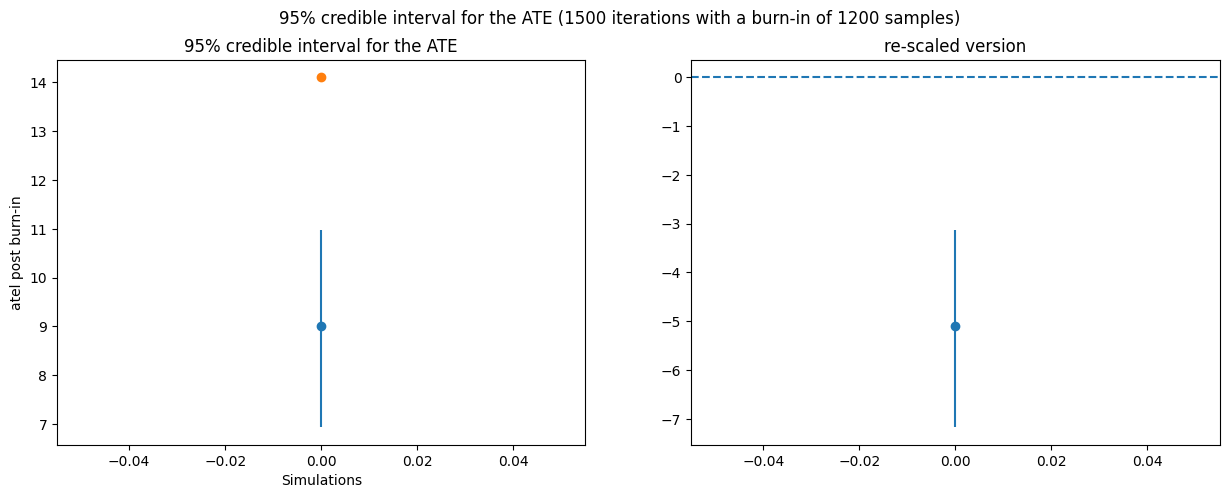

In [6]:
plt.figure(figsize = (15, 5))
plt.suptitle(f"95% credible interval for the ATE ({params['nbr_iter']} iterations with a burn-in of {4*int(params['nbr_iter']/5)} samples)")

ax1 = plt.subplot(1, 2, 1)
ax1.errorbar(np.arange(n_mcmc), dict_coverage["mean"], yerr=np.array(dict_coverage["bounds_tuple"]).T, fmt='o')
ax1.plot(np.arange(n_mcmc), dict_coverage["ate_common_records"], 'o')
ax1.set_xlabel("Simulations")
ax1.set_ylabel("atel post burn-in")
ax1.set_title("95% credible interval for the ATE")

ax2 = plt.subplot(1, 2, 2)
ax2.errorbar(np.arange(n_mcmc), dict_coverage["ate_mean"], yerr=np.array(dict_coverage["bounds_tuple"]).T, fmt='o')
ax2.axhline(0, ls='--')
ax2.set_title("re-scaled version")

plt.savefig(os.path.join('img', f"BART-new_credible_intervals_coverage_{params['nbr_iter']}_iter_{4*int(params['nbr_iter']/5)}_burn-in.pdf"), format="pdf", bbox_inches="tight")
plt.show()